In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import math
import matplotlib.dates as mdates

In [34]:
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [35]:
# Keeping only relevant columns for training
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Dropping NaN values that may have been created by moving averages and Bollinger Bands
data.dropna(inplace=True)

# Splitting the dataset into training and testing sets
train = data[:'2020']
test = data['2021':]

In [36]:
# Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled = sc.fit_transform(train)
test_scaled = sc.transform(test)

In [37]:
# Preparing training data
x_train, y_train = [], []
for i in range(60, len(train_scaled)):
    x_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i, 1])  # Predicting 'High' which is the second column (index 1)

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping x_train to be 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

In [38]:
print("x_train",x_train[0])

print("y_train",y_train[0])

print(len(x_train))

print(len(y_train))

print(x_train.shape) # Use slicing to get the first 5 elements

print(y_train.shape)

x_train [[0.03652149 0.03712895 0.03841267 0.03805599 0.02826372 0.09934038]
 [0.03763702 0.03712895 0.03865702 0.03810391 0.02830027 0.13570069]
 [0.03778251 0.0370335  0.03807057 0.03719325 0.02760541 0.16273823]
 [0.03656998 0.03522001 0.03645783 0.03565952 0.02643506 0.13829806]
 [0.03487245 0.03607903 0.03670218 0.03666603 0.02720311 0.14034268]
 [0.03695799 0.03550635 0.03611573 0.03479678 0.02577675 0.19663551]
 [0.03424192 0.0337883  0.03508943 0.03383819 0.02504531 0.18752146]
 [0.03477544 0.03436098 0.03557814 0.03518022 0.02606932 0.14247835]
 [0.03501794 0.03712895 0.03679992 0.03810391 0.02830027 0.17891593]
 [0.03875255 0.03779708 0.03899911 0.03762462 0.02793455 0.23241228]
 [0.037152   0.03779708 0.03885251 0.03877492 0.02881233 0.12552442]
 [0.03744301 0.03636538 0.03704427 0.03633052 0.02694708 0.15205217]
 [0.03647299 0.03531545 0.03552927 0.03355061 0.02482587 0.21052492]
 [0.0335144  0.03283383 0.02986023 0.02851802 0.02098574 0.3032425 ]
 [0.0298283  0.03025675 0.

In [39]:
# Creating the GRU model
# The GRU architecture
regressorGRU = Sequential()

# First GRU layer with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# # Third GRU layer
# regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
# regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# # The output layer
regressorGRU.add(Dense(units=1))


c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0550
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0071
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0032
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0026
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0022
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0024
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0017
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0019
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0018
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0018
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0019
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0017
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0018
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0018
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0

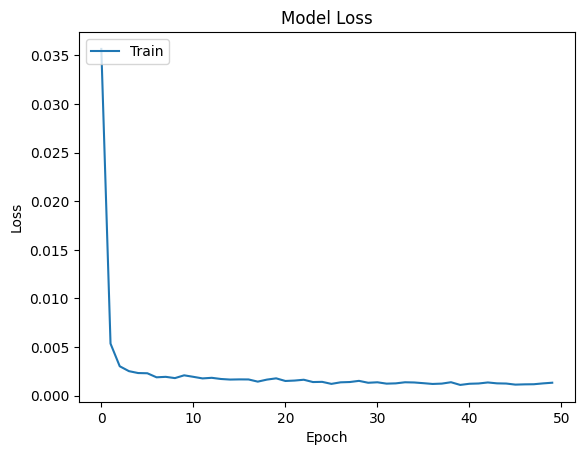

In [40]:
# Compiling the model
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Fitting the model
regressorGRU.fit(x_train, y_train, epochs=50, batch_size=160)

# Plot the loss graph
plt.plot(regressorGRU.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


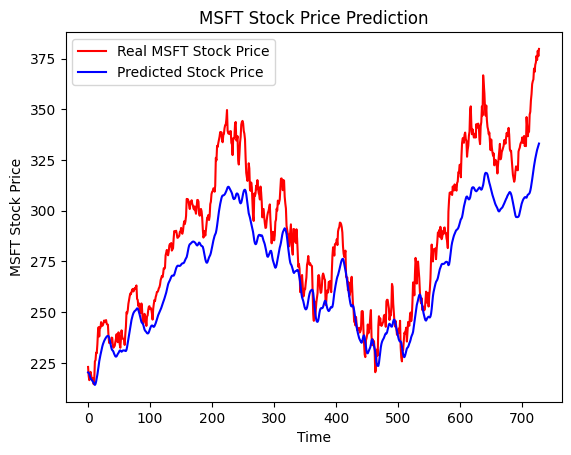

In [41]:
# Preparing the test set
inputs = data[len(data) - len(test) - 60:].values
inputs = sc.transform(inputs)

x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Predicting the stock prices
predicted_with_gru = regressorGRU.predict(x_test)

# Create an array to hold the predicted values with the correct shape
predicted_with_gru_reshaped = np.zeros((predicted_with_gru.shape[0], x_test.shape[2]))  # Same number of columns as input data
predicted_with_gru_reshaped[:, 1] = predicted_with_gru.flatten()  # Assign predicted values to the "High" column

# Inverse transform the predictions
predicted_with_gru = sc.inverse_transform(predicted_with_gru_reshaped)[:, 1]  # Only take the "High" column

# Visualization of predictions
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="Real MSFT Stock Price")
    plt.plot(predicted, color="blue", label="Predicted Stock Price")
    plt.title("MSFT Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MSFT Stock Price")
    plt.legend()
    plt.show()

plot_predictions(test['High'].values, predicted_with_gru)


                Actual   Predicted
Date                              
2021-01-04  223.000000  220.288337
2021-01-05  218.520004  220.057655
2021-01-06  216.490005  219.445892
2021-01-07  219.339996  218.336894
2021-01-08  220.580002  217.387613
                Actual   Predicted
Date                              
2023-11-16  376.350006  328.626929
2023-11-17  374.369995  330.035351
2023-11-20  378.869995  331.119845
2023-11-21  376.220001  332.237310
2023-11-22  379.790009  333.127017


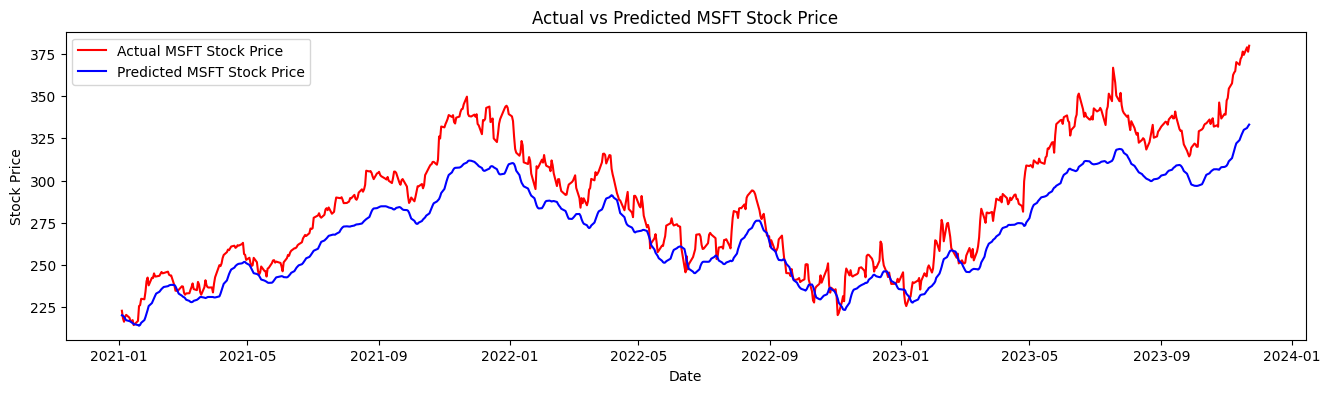

Mean Absolute Error (MAE): 17.041123349297724
Mean Squared Error (MSE): 403.8457954653358
Root Mean Squared Error (RMSE): 20.095914894956532


In [52]:
# Ensure the lengths of test and predicted_with_gru match
actual_values = test['High'].values[:len(predicted_with_gru)]

# Create a DataFrame to store the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predicted_with_gru
}, index=test.index[:len(predicted_with_gru)])

# Display the DataFrame in table format
print(comparison_df.head())
print(comparison_df.tail())

# Plot the actual vs predicted values
plt.figure(figsize=(16, 4))
plt.plot(comparison_df['Actual'], label='Actual MSFT Stock Price', color='red')
plt.plot(comparison_df['Predicted'], label='Predicted MSFT Stock Price', color='blue')
plt.title('Actual vs Predicted MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
actual_values = test['High'].values[:len(predicted_with_gru)]
mae = mean_absolute_error(actual_values, predicted_with_gru)
mse = mean_squared_error(actual_values, predicted_with_gru)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [49]:
# Splitting the data
train = data[:'2020']
test = data['2021':]

# Reload the data from the CSV file to get back the dropped data
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.info()

# Scaling the new features for Linear Regression
features_to_scale = ['MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']
scaler_lr = MinMaxScaler()
train_scaled_lr = scaler_lr.fit_transform(train[features_to_scale])
test_scaled_lr = scaler_lr.transform(test[features_to_scale])

# Prepare x_train and y_train for Linear Regression
x_train_lr, y_train_lr = train_scaled_lr, train['High'].values
x_test_lr, y_test_lr = test_scaled_lr, test['High'].values


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3497 entries, 2010-01-04 to 2023-11-22
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3497 non-null   float64
 1   High       3497 non-null   float64
 2   Low        3497 non-null   float64
 3   Close      3497 non-null   float64
 4   Adj Close  3497 non-null   float64
 5   Volume     3497 non-null   int64  
 6   year       3497 non-null   int64  
 7   month      3497 non-null   int64  
 8   day        3497 non-null   int64  
 9   MA5        3497 non-null   float64
 10  MA10       3497 non-null   float64
 11  MA20       3497 non-null   float64
 12  EMA        3497 non-null   float64
 13  BB_upper   3497 non-null   float64
 14  BB_lower   3497 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 437.1 KB


In [50]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_lr, y_train_lr)

# Print model coefficients (weights)
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Predict using Linear Regression
predicted_lr = lin_reg.predict(x_test_lr)

Coefficients: [ 282.10629445 -119.85355872  -14.99786829   88.80686035  -19.68005552
   -8.93293203]
Intercept: 23.77737110251008


In [51]:
# Make predictions on the testing set
y_pred = lin_reg.predict(x_test_lr)

# Display all predictions in table form
predictions_df = pd.DataFrame({
    'Date': test.index[:len(y_pred)],
    'Predicted High Prices': y_pred,
    'Actual High Prices': y_test_lr[:len(y_pred)]
})

print(predictions_df.head(10))

        Date  Predicted High Prices  Actual High Prices
0 2021-01-04             225.628172          223.000000
1 2021-01-05             223.500323          218.520004
2 2021-01-06             220.822481          216.490005
3 2021-01-07             219.401897          219.339996
4 2021-01-08             218.878819          220.580002
5 2021-01-11             217.942201          218.910004
6 2021-01-12             217.933542          217.100006
7 2021-01-13             218.483906          216.759995
8 2021-01-14             218.350321          217.460007
9 2021-01-15             217.011980          214.509995


In [53]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test_lr, y_pred)
mse = mean_squared_error(y_test_lr, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.3426885749249053
Mean Squared Error (MSE): 19.177898029086517
Root Mean Squared Error (RMSE): 4.379257702977357


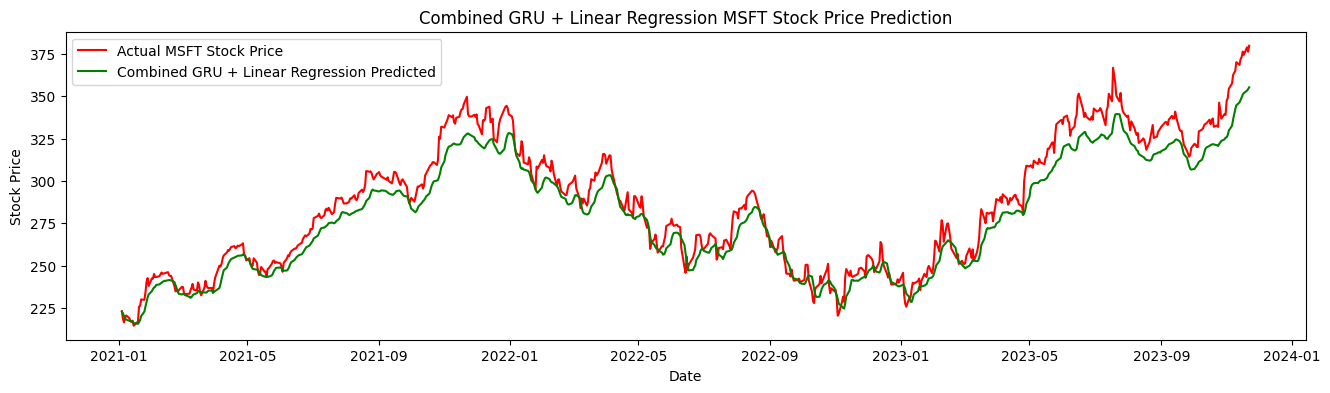

Mean Absolute Error (MAE) for Combined Predictions: 8.839988034129322
Mean Squared Error (MSE) for Combined Predictions: 113.42117289109964
Root Mean Squared Error (RMSE) for Combined Predictions: 10.64993769423557


In [56]:
# Combine GRU and Linear Regression predictions (average)
predicted_combined = (predicted_with_gru[:len(predicted_lr)] + predicted_lr) / 2

# Plotting the combined predictions
plt.figure(figsize=(16, 4))
plt.plot(test.index[:len(predicted_combined)], test['High'].values[:len(predicted_combined)], label='Actual MSFT Stock Price', color='red')
plt.plot(test.index[:len(predicted_combined)], predicted_combined, label='Combined GRU + Linear Regression Predicted', color='green')
plt.title('Combined GRU + Linear Regression MSFT Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE for the combined predictions
mae_combined = mean_absolute_error(test['High'].values[:len(predicted_combined)], predicted_combined)
mse_combined = mean_squared_error(test['High'].values[:len(predicted_combined)], predicted_combined)
rmse_combined = np.sqrt(mse_combined)

print(f"Mean Absolute Error (MAE) for Combined Predictions: {mae_combined}")
print(f"Mean Squared Error (MSE) for Combined Predictions: {mse_combined}")
print(f"Root Mean Squared Error (RMSE) for Combined Predictions: {rmse_combined}")

In [ ]:
save_model